In [1]:
from sklearn import tree
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

(array([32., 41., 42., 24., 11.]),
 array([4.3 , 5.02, 5.74, 6.46, 7.18, 7.9 ]),
 <a list of 5 Patch objects>)

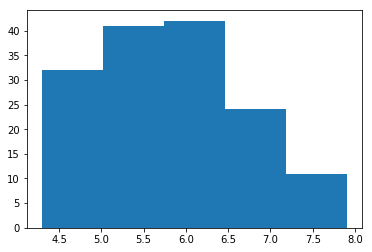

In [9]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[:, 0], 5)

In [10]:
data["sepal.length"] = np.digitize(data.iloc[:, 0], [4.3, 5.02, 5.74, 6.46, 7.18, 7.9])

(array([ 8., 39., 47., 41., 11.,  4.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4]),
 <a list of 6 Patch objects>)

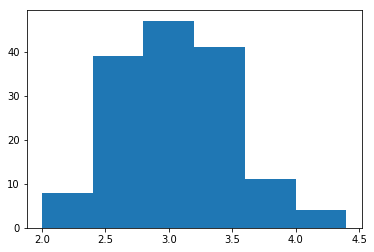

In [24]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[:, 1], 6)

In [26]:
data["sepal.width"] = np.digitize(data.iloc[:, 1], [2, 2.4, 2.8, 3.2, 3.6, 4.4])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

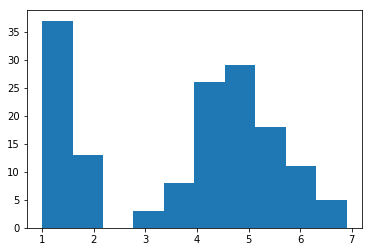

In [57]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[:, 2], 10)

In [58]:
data["petal.length"] = np.digitize(data.iloc[:, 2], [1, 1.59, 3.95, 4.54, 5.13, 5.72, 6.9 ])

(array([41.,  9.,  0., 15., 33., 18., 17., 17.]),
 array([0.1, 0.4, 0.7, 1. , 1.3, 1.6, 1.9, 2.2, 2.5]),
 <a list of 8 Patch objects>)

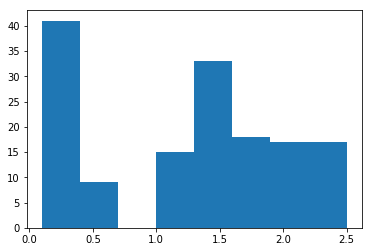

In [63]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[:, 3], 8)

In [64]:
data['petal.width'] = np.digitize(data.iloc[:, 3], [0.1, 0.4, 1.3, 1.6, 1.9, 2.2, 2.5])

In [65]:
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,4,3,5,6,Virginica
146,3,2,4,5,Virginica
147,4,3,5,5,Virginica
148,3,4,5,6,Virginica
149,3,3,4,4,Virginica


In [66]:
#X - descriptive features, Y - target feature
X = np.array(data.iloc[:,:-1])
Y = np.array(data.iloc[:,-1])
descriptive_features = [x+" (cm)" for x in list(data.columns[:-1])]
target_names = list(set(data.iloc[:,-1]))

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

In [69]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)


In [70]:
tree.export_graphviz(clf, out_file="iris_tree_discretized.dot",
                    feature_names = descriptive_features,
                    class_names = target_names,
                    filled=True, rounded=True,  
                    special_characters=True)

In [76]:
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<petal.width (cm) &le; 3.5<br/>gini = 0.664<br/>samples = 105<br/>value = [31, 37, 37]<br/>class = Setosa>, fillcolor="#39e58100"] ;
1 [label=<petal.width (cm) &le; 1.5<br/>gini = 0.54<br/>samples = 68<br/>value = [31, 34, 3]<br/>class = Setosa>, fillcolor="#39e58115"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 26<br/>value = [26, 0, 0]<br/>class = Versicolor>, fillcolor="#e58139ff"] ;
1 -> 2 ;
3 [label=<sepal.width (cm) &le; 3.5<br/>gini = 0.325<br/>samples = 42<br/>value = [5, 34, 3]<br/>class = Setosa>, fillcolor="#39e581c8"] ;
1 -> 3 ;
4 [label=<petal.length (cm) &le; 4.5<br/>gini = 0.153<br/>samples = 36<br/>value = [0, 33, 3]<br/>class = Setosa>, fillcolor="#39e581e8"] ;
3 -> 4 ;
5 [label=<petal.length (cm) &le; 3.5<br/>gini = 0.108<br/>samples = 35<br/>value = [0, 33, 2]<br/>class = Setosa>, fillcolor="#39e581f0"] ;
4 -> 5 ;
6 [label=<gini = 0.0<br/>samples = 27<br/>value = [0, 27, 0]<br/>class = Setosa>, fillcolor="#39e581ff"] ;
5 -> 6 ;
7 [label=<sepal.width (cm) &le; 1.5<br/>gini = 0.375<br/>samples = 8<br/>value = [0, 6, 2]<br/>class = Setosa>, fillcolor="#39e581aa"] ;
5 -> 7 ;
8 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 0, 1]<br/>class = Virginica>, fillcolor="#8139e5ff"] ;
7 -> 8 ;
9 [label=<sepal.length (cm) &le; 3.5<br/>gini = 0.245<br/>samples = 7<br/>value = [0, 6, 1]<br/>class = Setosa>, fillcolor="#39e581d4"] ;
7 -> 9 ;
10 [label=<sepal.width (cm) &le; 2.5<br/>gini = 0.375<br/>samples = 4<br/>value = [0, 3, 1]<br/>class = Setosa>, fillcolor="#39e581aa"] ;
9 -> 10 ;
11 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1, 0]<br/>class = Setosa>, fillcolor="#39e581ff"] ;
10 -> 11 ;
12 [label=<gini = 0.444<br/>samples = 3<br/>value = [0, 2, 1]<br/>class = Setosa>, fillcolor="#39e5817f"] ;
10 -> 12 ;
13 [label=<gini = 0.0<br/>samples = 3<br/>value = [0, 3, 0]<br/>class = Setosa>, fillcolor="#39e581ff"] ;
9 -> 13 ;
14 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 0, 1]<br/>class = Virginica>, fillcolor="#8139e5ff"] ;
4 -> 14 ;
15 [label=<petal.width (cm) &le; 2.5<br/>gini = 0.278<br/>samples = 6<br/>value = [5, 1, 0]<br/>class = Versicolor>, fillcolor="#e58139cc"] ;
3 -> 15 ;
16 [label=<gini = 0.0<br/>samples = 5<br/>value = [5, 0, 0]<br/>class = Versicolor>, fillcolor="#e58139ff"] ;
15 -> 16 ;
17 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1, 0]<br/>class = Setosa>, fillcolor="#39e581ff"] ;
15 -> 17 ;
18 [label=<petal.length (cm) &le; 4.5<br/>gini = 0.149<br/>samples = 37<br/>value = [0, 3, 34]<br/>class = Virginica>, fillcolor="#8139e5e9"] ;
0 -> 18 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
19 [label=<sepal.width (cm) &le; 3.5<br/>gini = 0.375<br/>samples = 12<br/>value = [0, 3, 9]<br/>class = Virginica>, fillcolor="#8139e5aa"] ;
18 -> 19 ;
20 [label=<sepal.length (cm) &le; 3.5<br/>gini = 0.298<br/>samples = 11<br/>value = [0, 2, 9]<br/>class = Virginica>, fillcolor="#8139e5c6"] ;
19 -> 20 ;
21 [label=<sepal.width (cm) &le; 2.5<br/>gini = 0.18<br/>samples = 10<br/>value = [0, 1, 9]<br/>class = Virginica>, fillcolor="#8139e5e3"] ;
20 -> 21 ;
22 [label=<petal.width (cm) &le; 4.5<br/>gini = 0.32<br/>samples = 5<br/>value = [0, 1, 4]<br/>class = Virginica>, fillcolor="#8139e5bf"] ;
21 -> 22 ;
23 [label=<sepal.length (cm) &le; 2.0<br/>gini = 0.444<br/>samples = 3<br/>value = [0, 1, 2]<br/>class = Virginica>, fillcolor="#8139e57f"] ;
22 -> 23 ;
24 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 0, 1]<br/>class = Virginica>, fillcolor="#8139e5ff"] ;
23 -> 24 ;
25 [label=<gini = 0.5<br/>samples = 2<br/>value = [0, 1, 1]<br/>class = Setosa>, fillcolor="#39e58100"] ;
23 -> 25 ;
26 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 0, 2]<br/>class = Virginica>, fillcolor="#8139e5ff"] ;
22 -> 26 ;
27 [label=<gini = 0.0<br/>samples = 5<br/>value = [0, 0, 5]<br/>class = Virginica>, fillcolor="#8139e5ff"] ;
21 -> 27 ;
28 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1, 0]<br/>class = Setosa>, fillcolor="#39e581ff"] ;
20 -> 28 ;
29 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1, 0]<br/>class = Setosa>, fillcolor="#39e581ff"] ;
19 -> 29 ;
30 [label=<gini = 0.0<br/>samples = 25<br/>value = [0, 0, 25]<br/>class = Virginica>, fillcolor="#8139e5ff"] ;
18 -> 30 ;
}

SyntaxError: invalid syntax (<ipython-input-76-0d80c2638064>, line 1)

In [71]:
test_dataset = pd.DataFrame(columns = data.columns)
for column_idx in range(len(X_test[0])):
    test_dataset.iloc[:,column_idx] = X_test[:,column_idx]
test_dataset.iloc[:, -1] = Y_test

In [74]:
good = 0
for index, row in test_dataset.iterrows():
    if row["petal.width"] <= 3.5:
        if row["petal.width"] <= 1.5:
            if row[-1] == "Versicolor":
                good += 1
        else:
            if row[-1] == " Setosa":
                good += 1
    else:
        if row["petal.length"] <= 4.5:
            if row["sepal.width"] <= 3.5:
                if row["sepal.length"] <= 3.5:
                    if row[-1] == "Virginica":
                        good += 1
                else:
                    if row[-1] == "Setosa":
                        good += 1
            else:
                if row[-1] == "Setosa":
                    good += 1
        else:
            if row[-1] == "Virginica":
                good += 1

In [75]:
good

11

In [77]:
test_dataset.shape

(45, 5)

In [78]:
11/45

0.24444444444444444